<a href="https://colab.research.google.com/github/Arpith-binsa/Portfolio-Gisma/blob/main/exercises/machine-learning/other/data_preprocessing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [25]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
import sklearn.svm
import sklearn.metrics


## Defining Business Problem


## DATA collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (32561, 15)
df_train size: (24420, 15)
df_test size: (8141, 15)


## Data EXploration


In [4]:
df_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


<Axes: >

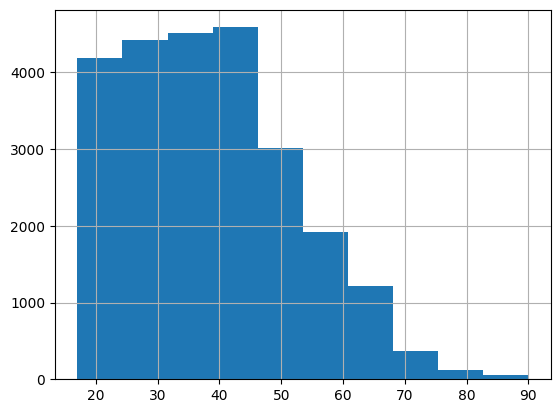

In [5]:
df_train["age"].hist()

<Axes: xlabel='workclass'>

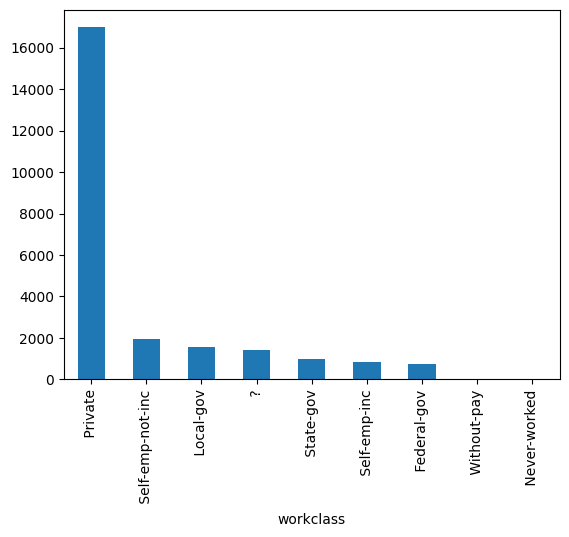

In [6]:
df_train["workclass"].value_counts().plot(kind="bar")

In [7]:
df_train["workclass"].unique()

array([' Private', ' State-gov', ' Self-emp-inc', ' ?',
       ' Self-emp-not-inc', ' Local-gov', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel='target'>

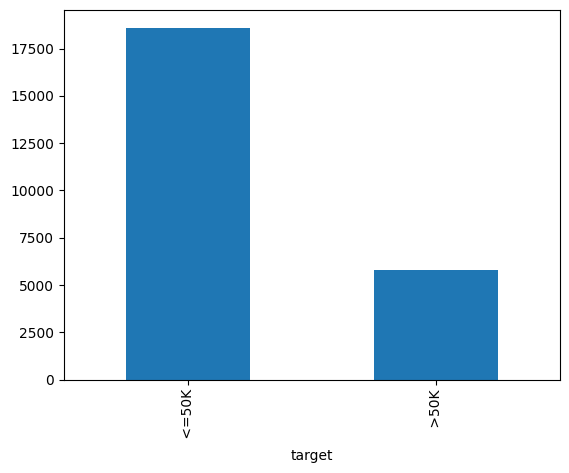

In [8]:
df_train["target"].value_counts().plot(kind="bar")

## Data Pre processing


In [12]:
df_train = df_train.replace(" ?", pd.NaT)
df_test = df_test.replace(" ?", pd.NaT)

df_train = df_train.dropna()
df_test = df_test.dropna()

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (22598, 15)
df_test size: (7564, 15)


In [16]:
x_train =  df_train.drop(["target"], axis=1)
y_train = df_train["target"]
x_test = df_test.drop(["target"], axis=1)
y_test = df_test["target"]

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (22598, 14)
y_train size: (22598,)
x_test size: (7564, 14)
y_test size: (7564,)


## Feature Engineering

In [27]:
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
numerical_attributes = x_train.select_dtypes(exclude=["object"]).columns

ct = sklearn.compose.ColumnTransformer(
    [
        ("onehot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes),
        ("standardize", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ],
    remainder="passthrough",
)

ct.fit(x_train)

x_train = ct.transform(x_train)
x_test = ct.transform(x_test)



## Model evaluation


In [28]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

In [33]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy = accuracy * 100
print(f"Accuracy: {accuracy:.5f}%")

Accuracy: 85.45743%
